In [55]:
# Import Libraries

import pandas as pd
import numpy as np

In [2]:
# Import CSV file and create DF

wr_df = pd.read_csv("NFLWRCumulative.csv")

In [3]:
# Import CSV file and create DF

salary_df = pd.read_csv("FantasySalary.csv")

In [4]:
# Join Receiver name to week so each week is specific to each player

wr_df['Receiver'] =  wr_df["full_name"] + wr_df['Week'].astype(str)

In [5]:
# Drop unwanted columns

wr_df.drop(columns=["full_name", "Week", "position"], inplace=True)

In [6]:
# Join Receiver name to week so each week is specific to each player

salary_df['Receiver'] =  salary_df["Player"] + salary_df['Week'].astype(str)

In [7]:
# Drop unwanted columns

salary_df.drop(columns=["Player", "Week", "Team", "Opp", "P"], inplace=True)

In [8]:
# Set index

wr_df.set_index("Receiver", inplace=True)

In [9]:
# Set index

salary_df.set_index("Receiver", inplace=True)

In [10]:
# Join two DF's together

wr_salary_df = wr_df.join(salary_df)

In [12]:
# Drop null values from new DF

wr_salary_df.dropna(inplace=True)

In [13]:
# Reset index

wr_salary_df.reset_index(inplace=True)

In [15]:
# Drop unwanted columns from new dataframe

wr_salary_df.drop(columns=['FDSal', 'FD Points', 'posteam', "rec_tds"], inplace=True)

In [18]:
# Create new columns that divides DKSal by 1000

wr_salary_df["DKSal"] = wr_salary_df["DKSal"] / 1000

In [20]:
# Create new column that determines Point Total to Salary Total

wr_salary_df["Value"] = wr_salary_df["DK Points"] / wr_salary_df["DKSal"]

In [22]:
# Determine range of new "Value" column

wr_salary_df["Value"].describe()

count    1867.000000
mean        1.502732
std         1.586396
min        -0.333333
25%         0.000000
50%         1.104167
75%         2.426150
max        10.800000
Name: Value, dtype: float64

In [23]:
# Create a new column that determines whether a player reaches the mean in "Value"

wr_salary_df["hit_miss"] = np.where(wr_salary_df["Value"] >= 1.5, 1,0)

In [30]:
# Drop features from model inputs

wr_salary_df.drop(columns=["Receiver", "racr"], inplace=True)

In [39]:
# Drop unwanted columns

wr_salary_df.drop(columns=["DK Points", "Value"], inplace=True)

In [40]:
# View DataTypes of columns

wr_salary_df.dtypes

targets_pg         float64
target_share       float64
rec_pg             float64
rec_ypg            float64
ez_targets_pg      float64
ez_target_share    float64
rec_drop_rate      float64
rec_ay_pg          float64
ay_share           float64
rec_adot           float64
wopr               float64
yac_pr             float64
routes_pg          float64
routes_per_db      float64
yprr               float64
tprr               float64
Opp Rank           float64
DKSal              float64
hit_miss             int64
dtype: object

In [41]:
# Separate independent and dependent variables

y = wr_salary_df["hit_miss"]
X = wr_salary_df.drop(columns=["hit_miss"])

In [43]:
# Import libraries for ML modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize

In [44]:
# Split data into train and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# Import Standard Scaler

scaler = StandardScaler()

In [46]:
# Fit scaler to X train data

X_scaler = scaler.fit(X_train)

In [47]:
# Transform scaled data

X_train_scaled = X_scaler.transform(X_train)

In [48]:
# Transform scaled data

X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Import RFC

from sklearn.ensemble import RandomForestClassifier

In [50]:
# Call model

model = RandomForestClassifier()

In [51]:
# Fit training data to model

model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [52]:
# Make model predictions

y_pred = model.predict(X_test)

/Users/drewhaggerty/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
# Import libraries

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
# Print Summaries

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[281   3]
 [183   1]]
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       284
           1       0.25      0.01      0.01       184

    accuracy                           0.60       468
   macro avg       0.43      0.50      0.38       468
weighted avg       0.47      0.60      0.46       468

0.6025641025641025


In [56]:
import seaborn as sn
import matplotlib.pyplot as plt

In [57]:
corrmatrix = wr_salary_df.corr()

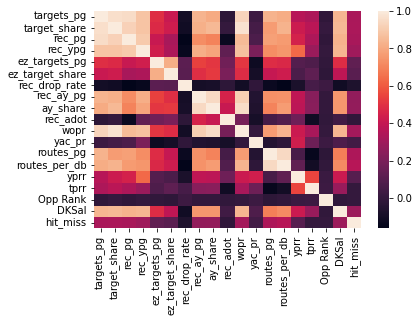

In [66]:
sn.heatmap(corrmatrix)
plt.show()

In [63]:
wr_salary_df.corr()

,targets_pg,target_share,rec_pg,rec_ypg,ez_targets_pg,ez_target_share,rec_drop_rate,rec_ay_pg,ay_share,rec_adot,wopr,yac_pr,routes_pg,routes_per_db,yprr,tprr,Opp Rank,DKSal,hit_miss
targets_pg,1.000000,0.961287,0.954151,0.877680,0.488921,0.412702,-0.099831,0.833736,0.807578,-0.023443,0.928310,0.027777,0.831632,0.810238,0.363836,0.336014,-0.013625,0.841049,0.326737
target_share,0.961287,1.000000,0.920553,0.880173,0.473967,0.427911,-0.111297,0.820061,0.848561,-0.001801,0.968561,0.048065,0.765794,0.828491,0.419529,0.369500,0.001823,0.849848,0.332156
rec_pg,0.954151,0.920553,1.000000,0.899800,0.408710,0.322499,-0.162241,0.723154,0.698745,-0.130219,0.854210,0.070710,0.777352,0.761205,0.450065,0.333961,-0.016656,0.827911,0.320964
rec_ypg,0.877680,0.880173,0.899800,1.000000,0.434526,0.336651,-0.135153,0.817979,0.787163,0.123941,0.872293,0.201196,0.723152,0.746261,0.635588,0.282992,-0.000586,0.837624,0.299457
ez_targets_pg,0.488921,0.473967,0.408710,0.434526,1.000000,0.815728,0.111784,0.539670,0.513242,0.172177,0.510124,-0.118864,0.483340,0.473117,0.095261,0.075560,-0.010867,0.486078,0.127781
ez_target_share,0.412702,0.427911,0.322499,0.336651,0.815728,1.000000,0.110115,0.488087,0.519181,0.200635,0.486680,-0.096792,0.402736,0.425707,0.066032,0.121517,-0.017637,0.385708,0.108948
rec_drop_rate,-0.099831,-0.111297,-0.162241,-0.135153,0.111784,0.110115,1.000000,-0.098536,-0.087998,-0.023447,-0.105292,-0.015710,-0.128366,-0.159462,-0.080269,0.055635,0.025878,-0.110868,-0.068276
rec_ay_pg,0.833736,0.820061,0.723154,0.817979,0.539670,0.488087,-0.098536,1.000000,0.943789,0.452942,0.909898,-0.054064,0.733589,0.739491,0.384124,0.234711,-0.007047,0.752803,0.261944
ay_share,0.807578,0.848561,0.698745,0.787163,0.513242,0.519181,-0.087998,0.943789,1.000000,0.409707,0.952430,-0.065333,0.699690,0.766984,0.374008,0.241041,-0.005262,0.750558,0.265322
rec_adot,-0.023443,-0.001801,-0.130219,0.123941,0.172177,0.200635,-0.023447,0.452942,0.409707,1.000000,0.188708,-0.093443,0.050929,0.083979,0.168861,-0.111144,-0.011211,0.036053,-0.016107
